## Data Wrangling

In [2]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from collections import Counter
from scipy import stats

In [3]:
# Import the file names 
fourteen = pd.read_csv('2k14')
fifteen = pd.read_csv('2k15')
sixteen = pd.read_csv('2k16')
seventeen = pd.read_csv('2k17')
eighteen = pd.read_csv('2k18')
nineteen = pd.read_csv('2k19')
twenty = pd.read_csv('2k20')
ratings = pd.read_csv('/Users/winstonwang/Downloads/Datasets/NBA/nbaratings.csv', index_col=0)
versions = [fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty]

In [4]:
# Some players are listed multiple times because they got traded mid-season, we'll keep only the "total" row
for i in range(len(versions)):
    versions[i] = versions[i].drop_duplicates(subset=['Player'])

In [5]:
# We'll combine all the versions into one big dataset
all = pd.concat(versions)
all

,Player,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Quincy Acy,2013-2014,PF,22,TOR,29,0,11.8,1.4,2.6,...,0.816,1.0,1.6,2.7,0.4,0.4,0.5,0.6,1.8,4.0
1,Jeff Adrien,2013-2014,PF,26,CHA,52,5,13.7,1.4,3.2,...,0.650,1.3,2.5,3.8,0.7,0.3,0.5,0.6,1.5,4.0
2,Arron Afflalo,2013-2014,SF,27,ORL,64,64,36.0,6.2,14.1,...,0.857,0.5,3.3,3.7,3.2,0.6,0.2,2.2,2.1,16.5
3,Josh Akognon,2013-2014,PG,26,DAL,3,0,3.0,0.7,1.3,...,NaN,0.0,0.3,0.3,0.3,0.0,0.0,0.0,1.0,1.7
4,Cole Aldrich,2013-2014,C,24,TOT,45,0,8.6,1.0,1.8,...,0.600,0.7,2.0,2.7,0.2,0.1,0.5,0.5,1.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Trae Young,2019-2020,PG,20,ATL,81,81,30.9,6.5,15.5,...,0.829,0.8,2.9,3.7,8.1,0.9,0.2,3.8,1.7,19.1
700,Cody Zeller,2019-2020,C,26,CHO,49,47,25.4,3.9,7.0,...,0.787,2.2,4.6,6.8,2.1,0.8,0.8,1.3,3.3,10.1
701,Tyler Zeller,2019-2020,C,29,TOT,6,1,15.5,2.7,5.0,...,0.778,1.8,2.2,4.0,0.7,0.2,0.5,0.7,3.3,7.7
704,Ante Zizic,2019-2020,C,22,CLE,59,25,18.3,3.1,5.6,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8


In [6]:
# We'll left join "ratings" and "all" to eliminate any players not included in the 2K ratings as this will give us the players' 2k ratings and his season averages for the season the rating was based on.
ratings = ratings.merge(all, how='left', on=['Player', 'Year'])
ratings = ratings.dropna().reset_index(drop=True)

In [7]:
ratings['Age'] = ratings['Age'].astype(int)

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 31 columns):
Player    2339 non-null object
Rating    2339 non-null int64
Year      2339 non-null object
Pos       2339 non-null object
Age       2339 non-null int64
Tm        2339 non-null object
G         2339 non-null float64
GS        2339 non-null float64
MP        2339 non-null float64
FG        2339 non-null float64
FGA       2339 non-null float64
FG%       2339 non-null float64
3P        2339 non-null float64
3PA       2339 non-null float64
3P%       2339 non-null float64
2P        2339 non-null float64
2PA       2339 non-null float64
2P%       2339 non-null float64
eFG%      2339 non-null float64
FT        2339 non-null float64
FTA       2339 non-null float64
FT%       2339 non-null float64
ORB       2339 non-null float64
DRB       2339 non-null float64
TRB       2339 non-null float64
AST       2339 non-null float64
STL       2339 non-null float64
BLK       2339 non-null float64
TOV  

In [34]:
# Check for any null values
ratings.isnull().sum()

Player    0
Rating    0
Year      0
Pos       0
Age       0
Tm        0
G         0
MP        0
FG%       0
FT%       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [9]:
ratings.describe()

,Rating,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,...,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000
mean,75.463873,26.139376,61.017101,32.220607,22.881873,3.689696,8.170757,0.446668,0.879906,2.471783,...,0.751299,0.948824,3.083968,4.030398,2.211116,0.740616,0.444079,1.320906,1.887559,9.937153
std,6.401578,4.151564,19.979923,29.998119,8.422862,2.113214,4.446880,0.065645,0.762710,1.969611,...,0.114675,0.804341,1.796026,2.450402,1.896328,0.430589,0.436334,0.813537,0.671982,5.859533
min,53.000000,19.000000,1.000000,0.000000,3.000000,0.100000,0.700000,0.091000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000
25%,72.000000,23.000000,51.000000,3.000000,16.300000,2.100000,4.700000,0.410000,0.200000,0.800000,...,0.698000,0.400000,1.800000,2.300000,0.900000,0.400000,0.200000,0.700000,1.400000,5.500000
50%,75.000000,26.000000,68.000000,22.000000,23.200000,3.200000,7.300000,0.442000,0.800000,2.200000,...,0.769000,0.700000,2.700000,3.500000,1.600000,0.700000,0.300000,1.100000,1.900000,8.700000
75%,79.000000,29.000000,77.000000,63.000000,30.100000,5.050000,11.000000,0.479000,1.400000,3.700000,...,0.826000,1.300000,4.000000,5.200000,2.900000,1.000000,0.600000,1.700000,2.300000,13.400000
max,99.000000,41.000000,83.000000,82.000000,38.700000,10.800000,24.500000,0.750000,5.100000,13.200000,...,1.000000,5.500000,11.100000,16.000000,11.700000,2.500000,3.000000,5.700000,4.100000,36.100000


Interesting Notes:
* Field Goal Percentage is negatively correlated to 3P, 3PA, 3P%
* Offensive Rebounds and Blocks are also negatively correlated to 3P, 3PA, 3P%

Most likely because big men tend to have higher FG%, ORB, and BLK and they aren't as good from the three point line.

## Data Exploration & Visualization

In [10]:
ratings.head()

,Player,Rating,Year,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,LeBron James,97,2019-2020,SF,34,LAL,55.0,55.0,35.2,10.1,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4
1,Kawhi Leonard,97,2019-2020,SF,27,TOR,60.0,60.0,34.0,9.3,...,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6
2,Giannis Antetokounmpo,96,2019-2020,PF,24,MIL,72.0,72.0,32.8,10.0,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
3,Kevin Durant,96,2019-2020,SF,30,GSW,78.0,78.0,34.6,9.2,...,0.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0
4,James Harden,96,2019-2020,PG,29,HOU,78.0,78.0,36.8,10.8,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


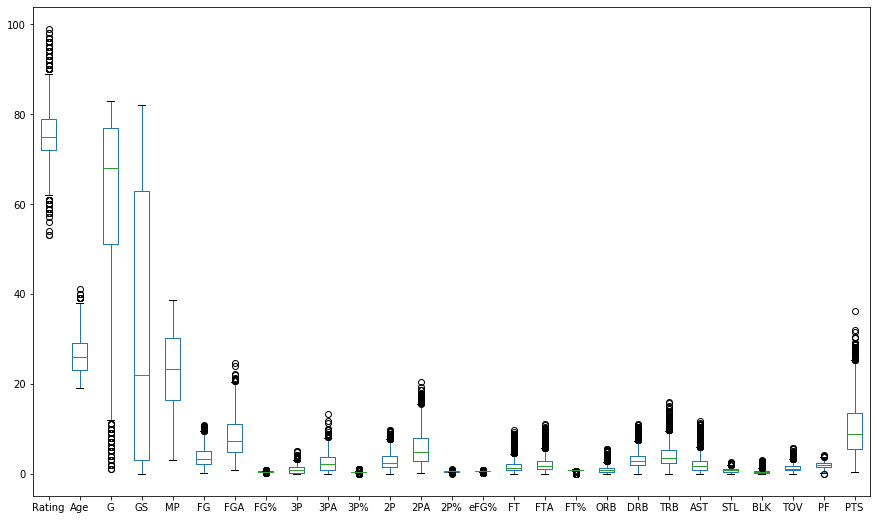

In [11]:
# Check for outliers in the data
ratings.plot(kind='box', figsize=(15,9))

There's quite a few outliers in almost all of the stats but I won't be removing any because these are all natural occurrences and legitimate observations in the data. Most of these are upper outliers because the NBA is a star-driven league and there's a few players who just dominate in their areas of expertise. 

* In case you were curious, that lone outlier above every other dot in the PTS column is James Harden when he averaged 36.1 points per game.

Average Rating is: 75.46
Median Rating is: 75.0


Text(0, 0.5, 'Number of Players')

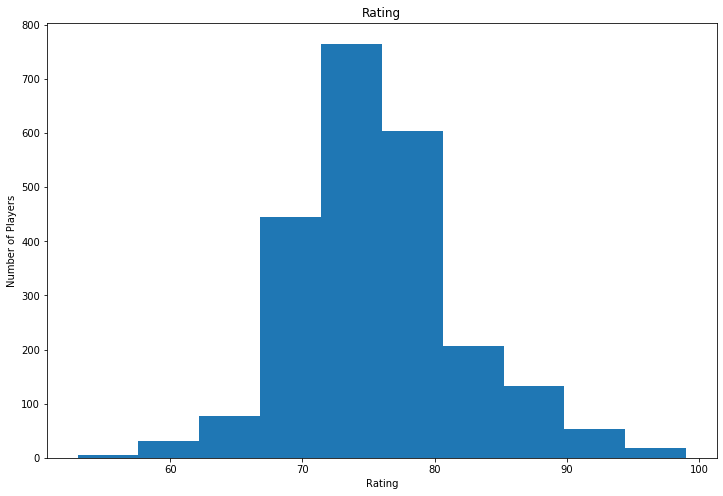

In [12]:
# What's the rating of an average NBA player?
print('Average Rating is: ' + str(round(ratings['Rating'].mean(), 2)))
print('Median Rating is: ' + str(ratings['Rating'].median()))
rcParams['figure.figsize'] = 12,8
ratings.hist(column='Rating', bins=10)
plt.grid(False)
plt.xlabel('Rating')
plt.ylabel('Number of Players')

              Player Name  Occurrences in Top 10
9            LeBron James                      7
8            Kevin Durant                      7
10          Stephen Curry                      6
16          Anthony Davis                      5
17           James Harden                      5
3       Russell Westbrook                      5
7              Chris Paul                      4
20          Kawhi Leonard                      4
5         Carmelo Anthony                      3
11            Paul George                      3
21  Giannis Antetokounmpo                      3
6             Kobe Bryant                      2
18       DeMarcus Cousins                      2
2           Dwight Howard                      2
0            Kyrie Irving                      2
23            Joel Embiid                      1
22     Karl-Anthony Towns                      1
19         Draymond Green                      1
12             Kevin Love                      1
15          Blake Gr

<Figure size 864x576 with 0 Axes>

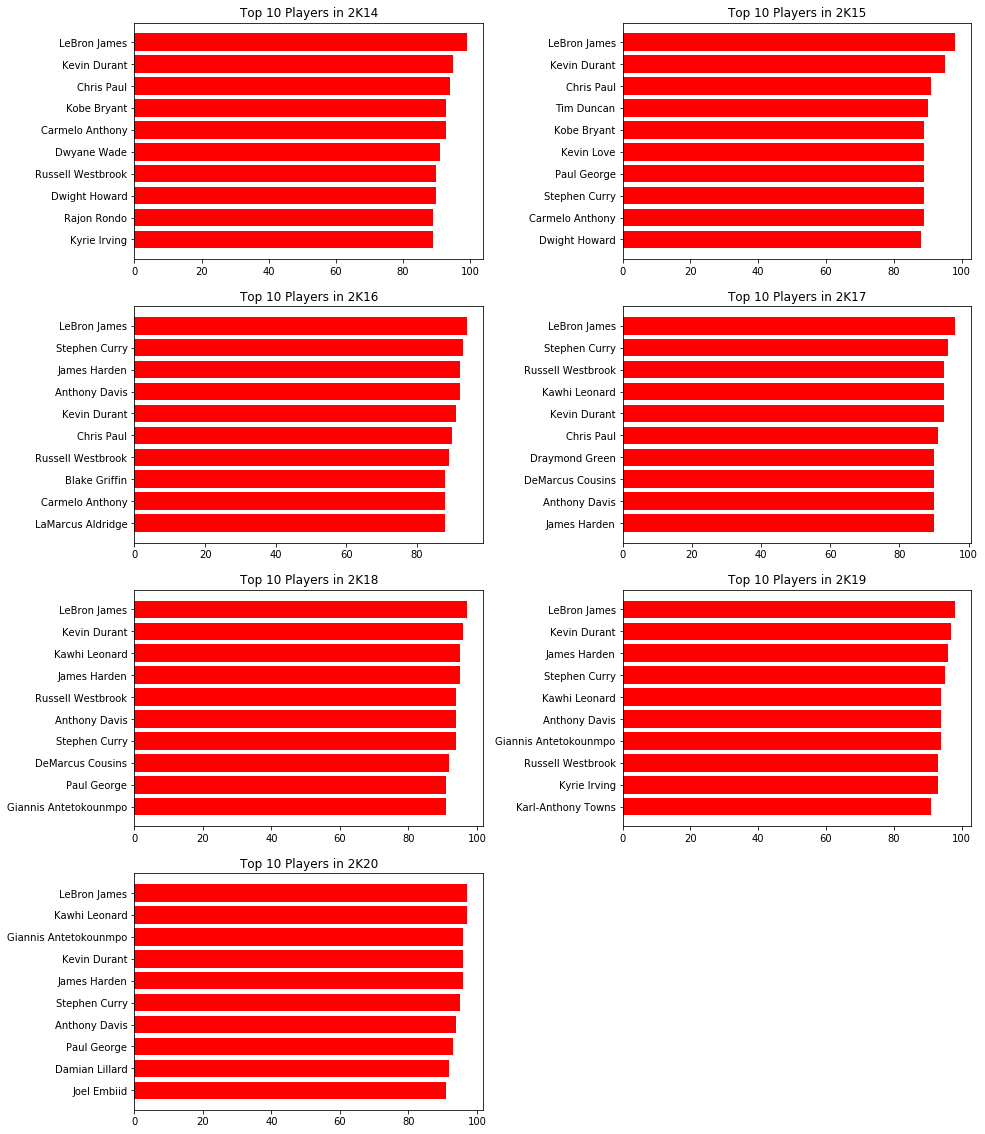

In [13]:
# Let's take a look at the top 10 rated players in these 2K games
plt.figure()
plt.figure(figsize=(15,20))
year = ['2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020']
name = ['ax', 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6']

def top_10():
    """Displays bar graphs of the top 10 players in each 2K game"""
    list = []
    for yr in range(7):
        name[yr] = plt.subplot(4,2,yr+1)
        top_players = ratings[ratings['Year'] == year[yr]].sort_values('Rating').tail(10)

        labels = top_players['Player'].tolist()
        player_ratings = top_players['Rating'].tolist()
        list += labels

        x = np.arange(len(labels))
        width = 0.4
        
        plt.barh(labels, player_ratings, color='r')
        plt.yticks(x, labels)
        plt.title('Top 10 Players in 2K' + str(year[yr][-2:]))
    df = pd.DataFrame.from_dict(Counter(list), orient='index').reset_index()
    df = df.rename(columns={'index':'Player Name',0:'Occurrences in Top 10'}).sort_values('Occurrences in Top 10', ascending=False)
    print(df)
    
top_10()
        
plt.subplots_adjust(hspace=0.2, wspace=0.4)

Text(0.5, 1.0, 'Average Player Ratings by Team')

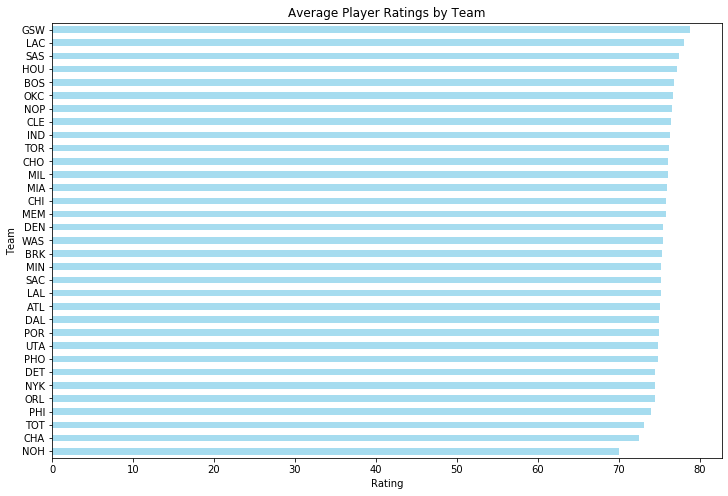

In [14]:
# Which teams have had the highest average player ratings over the last 7 2K games?
ratings.groupby(['Tm'])['Rating'].mean().sort_values().plot(kind='barh', color='#a6dcef')
plt.xticks(rotation='horizontal')
plt.xlabel('Rating')
plt.ylabel('Team')
plt.title('Average Player Ratings by Team')

Golden State had the highest rated players and it's not surprising as they dominated the decade in real life as well, led by Steph, Klay, Draymond, and KD. 

Note: NOH is so low because they only appear in one season, after which their name changed to NOP. That one season was rookie Anthony Davis season when they finished as the 5th worst team in the league. 

Text(0.5, 1.0, 'Average Player Ratings by Age')

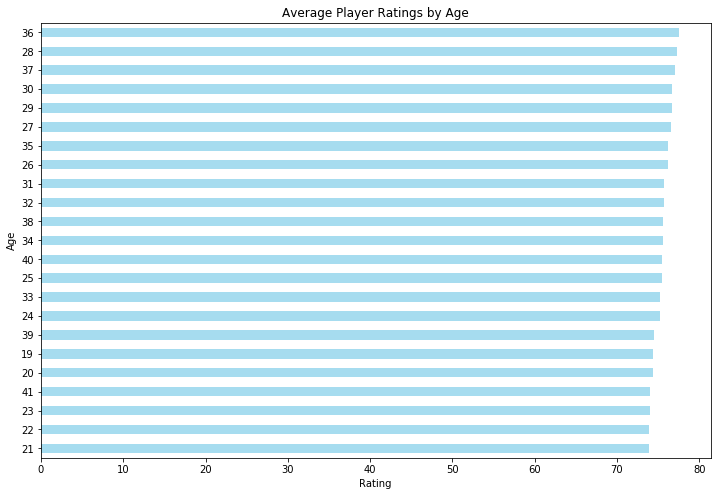

In [15]:
# At which age, are players rated the highest, on average?
ratings.groupby(['Age'])['Rating'].mean().sort_values().plot(kind='barh', color='#a6dcef')
plt.xticks(rotation='horizontal')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.title('Average Player Ratings by Age')

I'm surprised that 36 years old, on average, had the highest ratings considering most players hit their peak around 26-32. On the other hand, it's not surprising to see 21-23 year olds with the lowest ratings as they are mostly still unproven prospects who won't be rated too high no matter the hype surrounding them.

## Data Preparation

Text(0.5, 1, 'Correlation Between Stats')

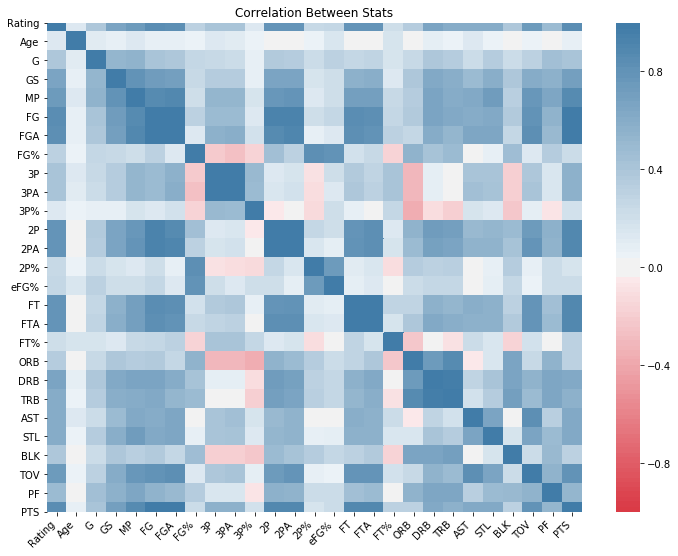

In [16]:
# Quick correlation map of the stats to test multicollinearity in the data
plt.subplots(figsize=(12,9))
ax = sns.heatmap(ratings.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10, 240, n=100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Correlation Between Stats")

In [17]:
# We'll delete features that are highly correlated to others and just keep one. For example, we'll keep total rebounds and ignore how many were offensive vs. defensive
ratings = ratings.drop(['GS','FG', 'FGA', 'FTA', 'FT', '3P', '3PA', '3P%', '2P', '2P%', '2PA', 'eFG%', 'ORB', 'DRB'], axis=1)

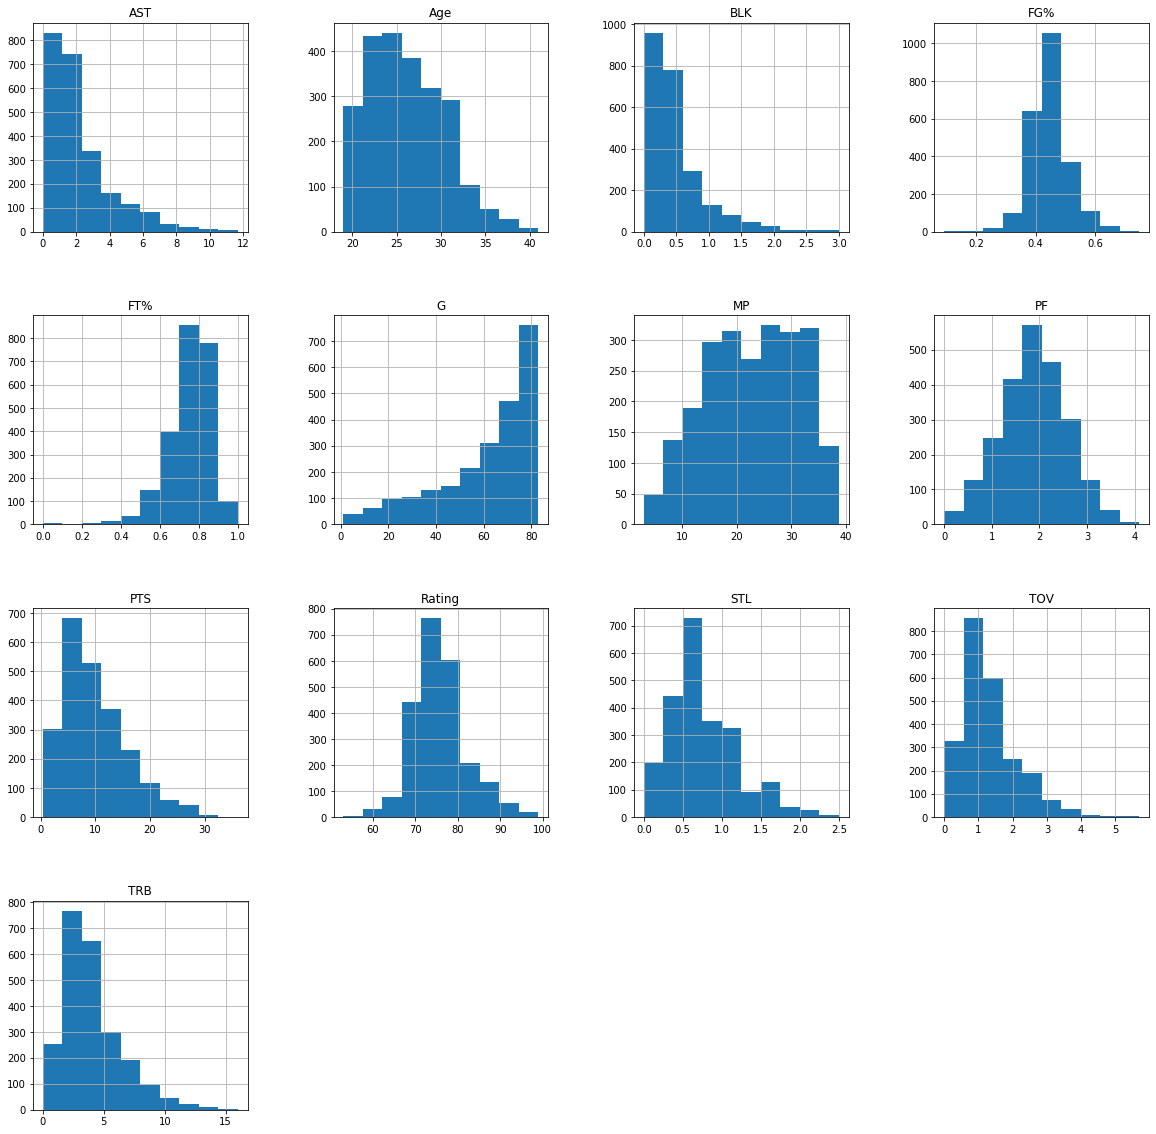

In [18]:
# Check distributions of each stat 
ratings.hist(bins=10, figsize=(20,20));
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig(fname='Distribution Plots of Stats')

In [19]:
# Do log transformation on the columns to reduce the skew 
for c in [c for c in ratings.columns if ratings[c].dtype == 'float64']:
    if ratings[c].skew() > 0.8: 
        ratings[c] = np.log10(ratings[c] + 1)
    elif ratings[c].skew() < -0.8:
        ratings[c] = ratings[c] ** 2
ratings

,Player,Rating,Year,Pos,Age,Tm,G,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,LeBron James,97,2019-2020,SF,34,LAL,3025.0,35.2,0.510,0.442225,0.977724,0.968483,0.361728,0.204120,0.662758,1.7,1.453318
1,Kawhi Leonard,97,2019-2020,SF,27,TOR,3600.0,34.0,0.496,0.729316,0.919078,0.633468,0.447158,0.146128,0.477121,1.5,1.440909
2,Giannis Antetokounmpo,96,2019-2020,PF,24,MIL,5184.0,32.8,0.578,0.531441,1.130334,0.838849,0.361728,0.397940,0.672098,3.2,1.457882
3,Kevin Durant,96,2019-2020,SF,30,GSW,6084.0,34.6,0.521,0.783225,0.869232,0.838849,0.230449,0.322219,0.591065,2.0,1.431364
4,James Harden,96,2019-2020,PG,29,HOU,6084.0,36.8,0.442,0.772641,0.880814,0.929419,0.477121,0.230449,0.778151,3.1,1.569374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Josh Harrellson,57,2013-2014,C,23,MIA,36.0,5.2,0.444,0.250000,0.342423,0.000000,0.079181,0.079181,0.176091,0.7,0.431364
2335,Jeremy Evans,56,2013-2014,PF,25,UTA,1369.0,5.8,0.614,0.404496,0.414973,0.113943,0.079181,0.146128,0.079181,0.8,0.477121
2336,DeSagana Diop,54,2013-2014,C,31,CHA,484.0,10.3,0.296,0.000000,0.518514,0.204120,0.079181,0.230449,0.146128,0.9,0.230449
2337,Royal Ivey,53,2013-2014,SG,31,PHI,2809.0,13.2,0.431,0.316969,0.322219,0.204120,0.146128,0.041393,0.146128,1.4,0.623249


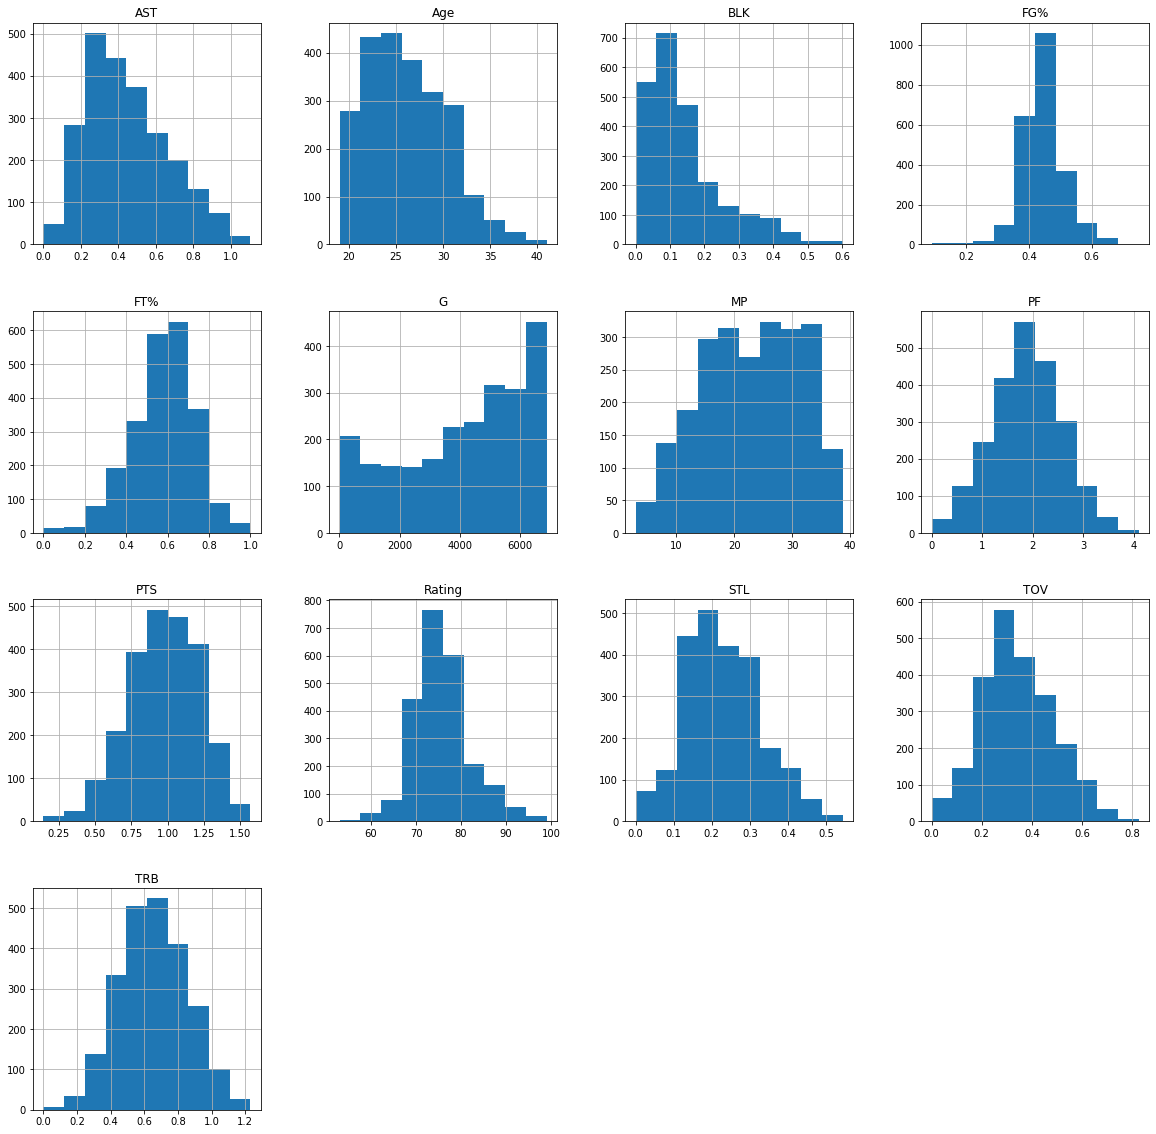

In [20]:
# Some of these do look better now! 
ratings.hist(bins=10, figsize=(20,20));

In [21]:
# Check the skew of the variables
ratings.skew()

Rating    0.583605
Age       0.598565
G        -0.513658
MP       -0.183527
FG%       0.130468
FT%      -0.448230
TRB       0.031568
AST       0.531552
STL       0.352576
BLK       1.199763
TOV       0.326480
PF       -0.024830
PTS      -0.294565
dtype: float64

In [22]:
# Make dummy variables out of the players' age because they usually hit their peak around 26-30 and then decline.
boundaries = [0, 22, 25, 30, np.inf]
names = [1, 2, 3, 4]

ratings['Age'] = pd.cut(ratings['Age'], boundaries, labels=names)

In [23]:
ratings['Age'].value_counts()

3    817
2    672
1    482
4    368
Name: Age, dtype: int64

standardize data (z-score)

In [24]:
# Standardize the data by using z-scores
for col in ratings.select_dtypes(include=[np.int64, np.float64]).columns:
    stats.zscore(ratings[col])

,Player,Rating,Year,Pos,Age,Tm,G,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,LeBron James,97,2019-2020,SF,4,LAL,3025.0,35.2,0.510,0.442225,0.977724,0.968483,0.361728,0.204120,0.662758,1.7,1.453318
1,Kawhi Leonard,97,2019-2020,SF,3,TOR,3600.0,34.0,0.496,0.729316,0.919078,0.633468,0.447158,0.146128,0.477121,1.5,1.440909
2,Giannis Antetokounmpo,96,2019-2020,PF,2,MIL,5184.0,32.8,0.578,0.531441,1.130334,0.838849,0.361728,0.397940,0.672098,3.2,1.457882
3,Kevin Durant,96,2019-2020,SF,3,GSW,6084.0,34.6,0.521,0.783225,0.869232,0.838849,0.230449,0.322219,0.591065,2.0,1.431364
4,James Harden,96,2019-2020,PG,3,HOU,6084.0,36.8,0.442,0.772641,0.880814,0.929419,0.477121,0.230449,0.778151,3.1,1.569374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Josh Harrellson,57,2013-2014,C,2,MIA,36.0,5.2,0.444,0.250000,0.342423,0.000000,0.079181,0.079181,0.176091,0.7,0.431364
2335,Jeremy Evans,56,2013-2014,PF,2,UTA,1369.0,5.8,0.614,0.404496,0.414973,0.113943,0.079181,0.146128,0.079181,0.8,0.477121
2336,DeSagana Diop,54,2013-2014,C,4,CHA,484.0,10.3,0.296,0.000000,0.518514,0.204120,0.079181,0.230449,0.146128,0.9,0.230449
2337,Royal Ivey,53,2013-2014,SG,4,PHI,2809.0,13.2,0.431,0.316969,0.322219,0.204120,0.146128,0.041393,0.146128,1.4,0.623249


## Regression

In [25]:
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn import model_selection
import statsmodels.api as sm

In [26]:
# Set the independent and dependent variables
y = ratings['Rating']
X = ratings[['Age', 'G', 'MP', 'FG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
print('The intercept is:\n' + str(lm.intercept_))

The intercept is:
53.27036028577351


In [29]:
# Let's take a look at the coefficients of each independent variables.
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coeff.style.format('{:.5f}')

,Coefficients
Age,0.09484
G,-0.00002
MP,-0.07246
FG%,5.47946
FT%,1.24870
TRB,5.02553
AST,5.14227
STL,6.11304
BLK,9.54057
TOV,6.28847


This shows us that the intercept is 53.27 and that PTS has the highest impact on a player's rating. Games played has virtually no effect on the player's rating.

Note: This means that for every 1% increase in PTS, the player's rating increases by 0.136 because we log transformed the features earlier.

In [30]:
# Let's test this against the testing data
predictions = lm.predict(X_test)

In [31]:
# Calculate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 2.4647445652275253
MSE: 11.494569138565959
RMSE: 3.3903641601701078


Text(0, 0.5, 'Predictions')

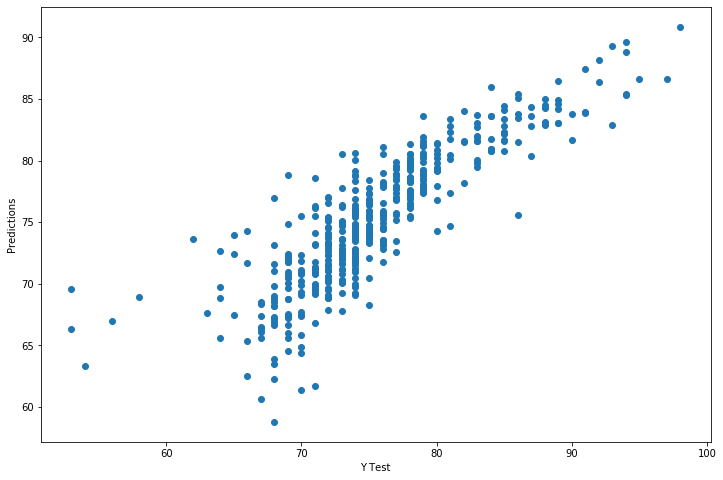

In [32]:
# Plot the actual ratings against our predictions to see the relationship.
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

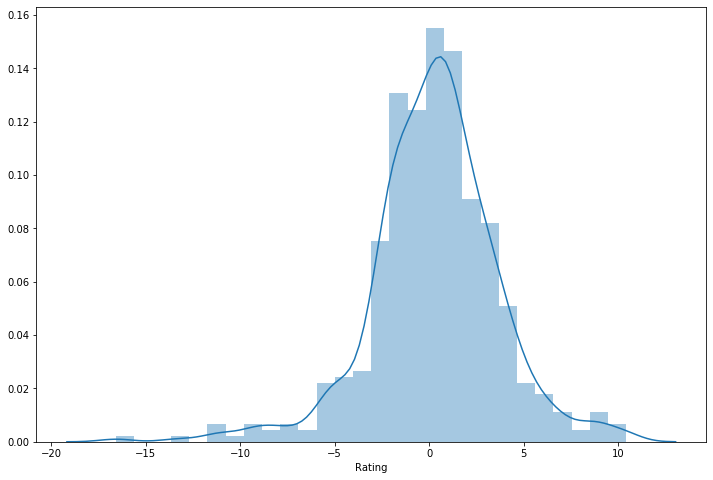

In [33]:
# Let's see the residual between the actual values and our predictions
sns.distplot(y_test-predictions)

Summary:

From these graphs, we can see that our model's predictions wasn't exactly the same as the actual ratings of our testing data. It wasn't too bad of a fit but there are definitely many more other variables that 2K accounts for when they make these ratings each season. My next steps are to get other variables and build more models to find a better fitting one.

## Next Steps:

* Check R-Squared to see how good our model fits and how much it actually explains. 
* Try other variables to create new models